# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2381 Долотов Никита Андреевич и Зазуля Илья Анатольевич. Вариант №5.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

При моделировании дискретных сигналов используется понятие **нормированного дискретного времени** $n$ — это индекс отсчёта, а также **дискретного времени** $t$, связанного с ним соотношением:

$$t = nT,$$

где $T$ — период дискретизации.

**Единичный цифровой импульс** определяется как:
$$
\delta_d(n) = \begin{cases}
1, & n = 0, \\
0, & n \neq 0,
\end{cases}
$$

и является дискретным аналогом дельта-функции Дирака $\delta(t)$.

**Дискретный единичный скачок** описывается формулой:
$$
\sigma_d(n) = \begin{cases}
0, & n < 0, \\
1, & n \geq 0,
\end{cases}
$$

и соответствует дискретизированной функции Хевисайда $u(t)$. Частота дискретизации определяется выражением:

$$f_d = \frac{1}{T}.$$

**Дискретная экспоненциальная функция** имеет вид:

$$s_1(n) = a^n, \quad n \geq 0,$$

и является последовательностью отсчётов непрерывной экспоненты:

$$s(t) = e^{bt}, \quad a = e^{bT}.$$

**Дискретный комплексный гармонический сигнал** задаётся формулой:

$$s_2(n) = C e^{j \hat{\omega}_0 n},$$

и может быть представлен через вещественную и мнимую части:

$$s_2(n) = C \cos(\hat{\omega}_0 n) + jC \sin(\hat{\omega}_0 n).$$

При моделировании **задержанных последовательностей** используется сдвиг аргумента на $m$ отсчётов:

* Задержанный импульс:
  $$
  \delta_d(n - m) = \begin{cases}
  1, & n = m, \\
  0, & n \neq m.
  \end{cases}
  $$

* Задержанный скачок:
  $$
  \sigma_d(n - m) = \begin{cases}
  0, & n < m, \\
  1, & n \geq m.
  \end{cases}
  $$
* Задержанная экспонента:
  $$
  s_1(n - m) = \begin{cases}
  a^{n - m}, & n \geq m, \\
  0, & n < m.
  \end{cases}
  $$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

### Расчёт параметров

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Номер бригады
Nb = 5

# Длина последовательности
N = 30 + Nb % 5

# Период дискретизации
T = 0.0005 * (1 + Nb % 3)

# Основание экспоненты
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))

# Амплитуда гармонического сигнала
C = 1 + Nb % 5

# Частота гармонического сигнала
w0 = math.pi / (6 + Nb % 5)

# Задержка
m = 5 + Nb % 5

print(f'Nb = {Nb}\nN = {N}\nT = {T}\na = {a}\nC = {C}\nw0 = {w0}\nm = {m}')

Nb = 5
N = 30
T = 0.0015
a = -0.8250000000000001
C = 1
w0 = 0.5235987755982988
m = 5


### Задание 1

Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:

1. Взаимосвязь между дискретным и дискретным нормированным временем;
2. Различие между единичным цифровым импульсом и дельта-функцией.

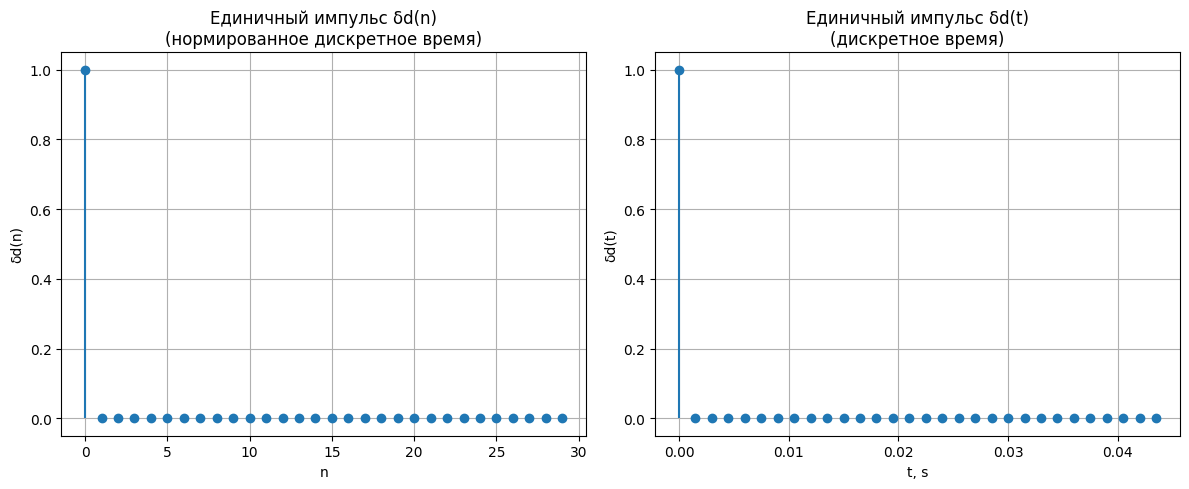

In [5]:
# Формирование временных шкал
n = np.arange(0, N)   # нормированное дискретное время
t = n * T             # дискретное время

# Формирование единичного цифрового импульса δd(n)
delta_d = np.zeros(N)
delta_d[0] = 1

# Построение графиков
plt.figure(figsize=(12, 5))

# График по нормированному времени
plt.subplot(1, 2, 1)
plt.stem(n, delta_d, basefmt=" ")
plt.title("Единичный импульс δd(n)\n(нормированное дискретное время)")
plt.xlabel("n")
plt.ylabel("δd(n)")
plt.grid(True)

# График по дискретному времени
plt.subplot(1, 2, 2)
plt.stem(t, delta_d, basefmt=" ")
plt.title("Единичный импульс δd(t)\n(дискретное время)")
plt.xlabel("t, s")
plt.ylabel("δd(t)")
plt.grid(True)

plt.tight_layout()
plt.show()

1. Связь между дискретным и нормированным временем задаётся формулой $t = nT$. Нормированное время $n$ — безразмерный индекс отсчёта (позиция в последовательности), а $t$ переводит этот индекс в физическую шкалу через шаг дискретизации $T$.

2. Единичный цифровой импульс $\delta_d(k)$ — это дискретная последовательность, принимающая значение 1 только при целочисленном индексе $k = 0$ и $0$ при всех других целых $k$. Дельта-функция Дирака $\delta(t)$ — это распределение в непрерывном времени: она нулевая везде, кроме $t = 0$, и имеет "единичную площадь" (интеграл равен 1); в точке $t = 0$ формально бесконечна.

### Задание 2

Смоделировать дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:
1. Соответствие между дискретным и аналоговым единичными скачками;
2. Чему равна частота дискретизации дискретного единичного скачка.

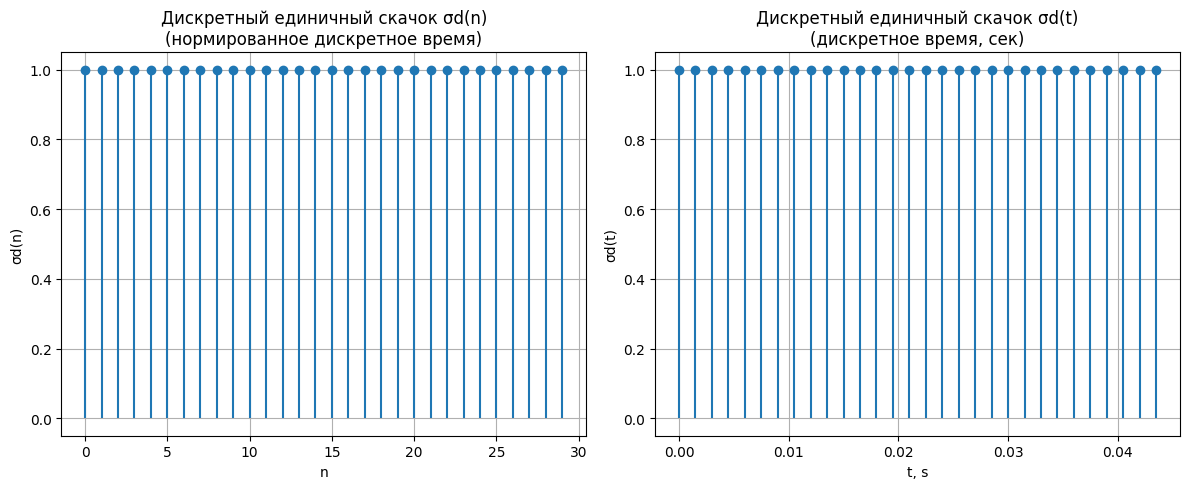

In [8]:
# Формирование дискретного единичного скачка σd(n)
sigma_d = np.ones(N)

# Построение графиков
plt.figure(figsize=(12, 5))

# График по нормированному времени n
plt.subplot(1, 2, 1)
plt.stem(n, sigma_d, basefmt=" ")
plt.title("Дискретный единичный скачок σd(n)\n(нормированное дискретное время)")
plt.xlabel("n")
plt.ylabel("σd(n)")
plt.grid(True)

# График по дискретному времени t
plt.subplot(1, 2, 2)
plt.stem(t, sigma_d, basefmt=" ")
plt.title("Дискретный единичный скачок σd(t)\n(дискретное время, сек)")
plt.xlabel("t, s")
plt.ylabel("σd(t)")
plt.grid(True)

plt.tight_layout()
plt.show()

1. Соответствие между дискретным и аналоговым единичными скачками.

Аналоговый единичный скачок определяется как функция Хевисайда:

$$u(t) = \begin{cases} 0, & t < 0, \\ 1, & t \geq 0. \end{cases}$$

Дискретный единичный скачок строится аналогично, но только в дискретные моменты времени:

$$\sigma_d(n) = \begin{cases} 0, & n < 0, \\ 1, & n \geq 0. \end{cases}$$

Таким образом, $\sigma_d(n)$ получается дискретизацией аналогового скачка $u(t)$ в точках $t = nT$. При этом нормированное дискретное время $n$ показывает номер отсчёта, а дискретное время $t = nT$ связывает этот отсчёт с реальной временной осью.

2. Частота дискретизации дискретного единичного скачка.

Частота дискретизации определяется как:

$$f_d = \frac{1}{T},$$

где $T$ — период дискретизации. Дискретный скачок формируется из отсчётов аналогового скачка, равномерно взятых с шагом $T$ по времени.

In [10]:
# Расчёт частоты дискретизации дискретного единичного скачка
f_d = 1 / T

print(f"Частота дискретизации: f_d = {f_d} Гц")

Частота дискретизации: f_d = 666.6666666666666 Гц


### Задание 3

Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $. Пояснить соответствие между дискретной и аналоговой экспонентами.

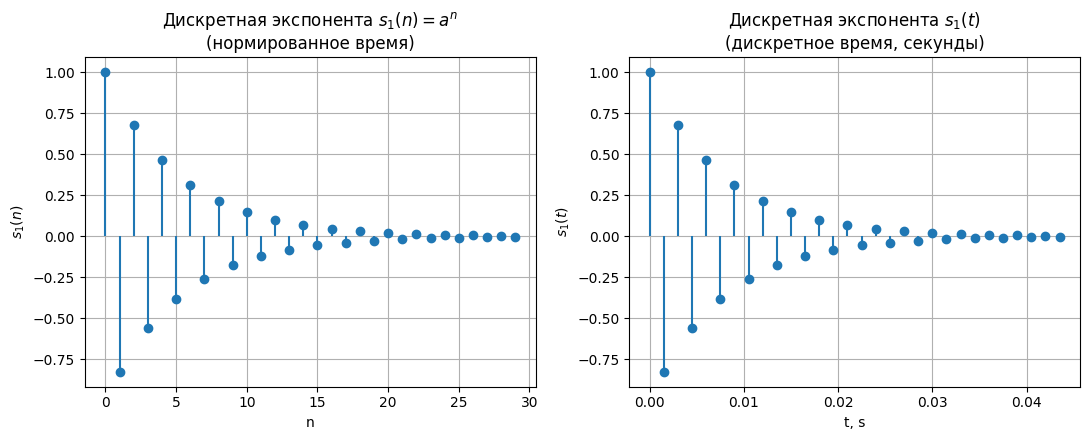

In [11]:
# Формирование дискретной экспоненциальной функции s1(n)
s1 = a ** n

# Построение графиков
plt.figure(figsize=(11, 4.5))

# График по нормированному времени
plt.subplot(1, 2, 1)
plt.stem(n, s1, basefmt=" ")
plt.title("Дискретная экспонента $s_1(n) = a^n$\n(нормированное время)")
plt.xlabel("n")
plt.ylabel("$s_1(n)$")
plt.grid(True)

# График по дискретному времени
plt.subplot(1, 2, 2)
plt.stem(t, s1, basefmt=" ")
plt.title("Дискретная экспонента $s_1(t)$\n(дискретное время, секунды)")
plt.xlabel("t, s")
plt.ylabel("$s_1(t)$")
plt.grid(True)

plt.tight_layout()
plt.show()

Дискретная экспоненциальная функция:

$$s_1(n) = a^n, \quad n \in \mathbb{Z},$$

является дискретным аналогом непрерывной экспоненты:

$$s(t) = e^{bt}, \quad t \in \mathbb{R}.$$

Связь между ними заключается в том, что дискретная экспонента получается выборкой (отсчётами) непрерывной экспоненты в моменты времени ($t = nT$):

$$s(nT) = e^{b nT} = \left(e^{bT}\right)^n = a^n.$$

Таким образом, дискретная экспонента определена только в дискретные моменты времени, тогда как аналоговая — для всех $t$.


### Задание 4

Смоделировать дискретный комплексный гармонический сигнал $s_2(k) = C \exp(j \hat{\omega_0} k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N-1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.

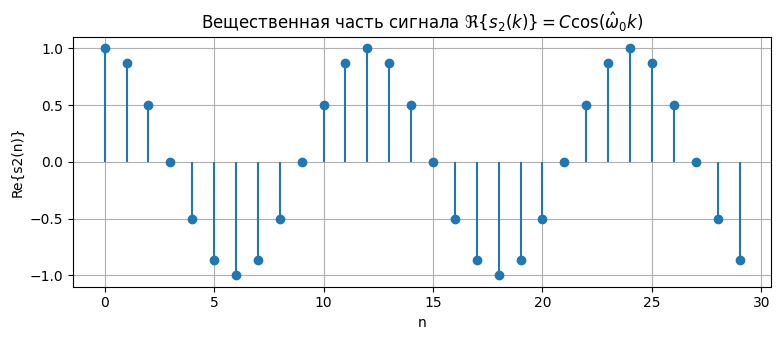

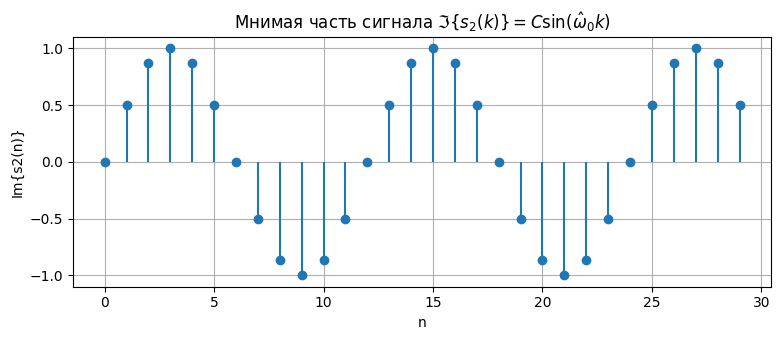

In [12]:
# Сигнал s2(k)
s2 = C * np.exp(1j * w0 * n)

# Вещественная и мнимая части
real_part = np.real(s2)
imag_part = np.imag(s2)

# График по вещественной части сигнала
plt.figure(figsize=(8, 3.5))
plt.stem(n, real_part, basefmt=" ")
plt.title("Вещественная часть сигнала $\\Re\\{s_2(k)\\}=C\\cos(\\hat\\omega_0 k)$")
plt.xlabel("n")
plt.ylabel("Re{s2(n)}")
plt.grid(True)
plt.tight_layout()

# График по мнимой части сигнала
plt.figure(figsize=(8, 3.5))
plt.stem(n, imag_part, basefmt=" ")
plt.title("Мнимая часть сигнала $\\Im\\{s_2(k)\\}=C\\sin(\\hat\\omega_0 k)$")
plt.xlabel("n")
plt.ylabel("Im{s2(n)}")
plt.grid(True)
plt.tight_layout()

plt.show()

Представление дискретного комплексного гармонического сигнала:

$$s_2(k) = C \cos(\hat\omega_0 k) + j C \sin(\hat\omega_0 k).$$

Значит две реальных последовательности:

$$x_1(k)=\Re{s_2(k)}=C\cos(\hat\omega_0 k),\qquad x_2(k)=\Im{s_2(k)}=C\sin(\hat\omega_0 k).$$

### Задание 5

Вывести графики последовательностей  $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$ задержанных на $m$ отсчетов, на интервале времени $n \in [0, N-1]$. Записать формулы задержанных последовательностей.

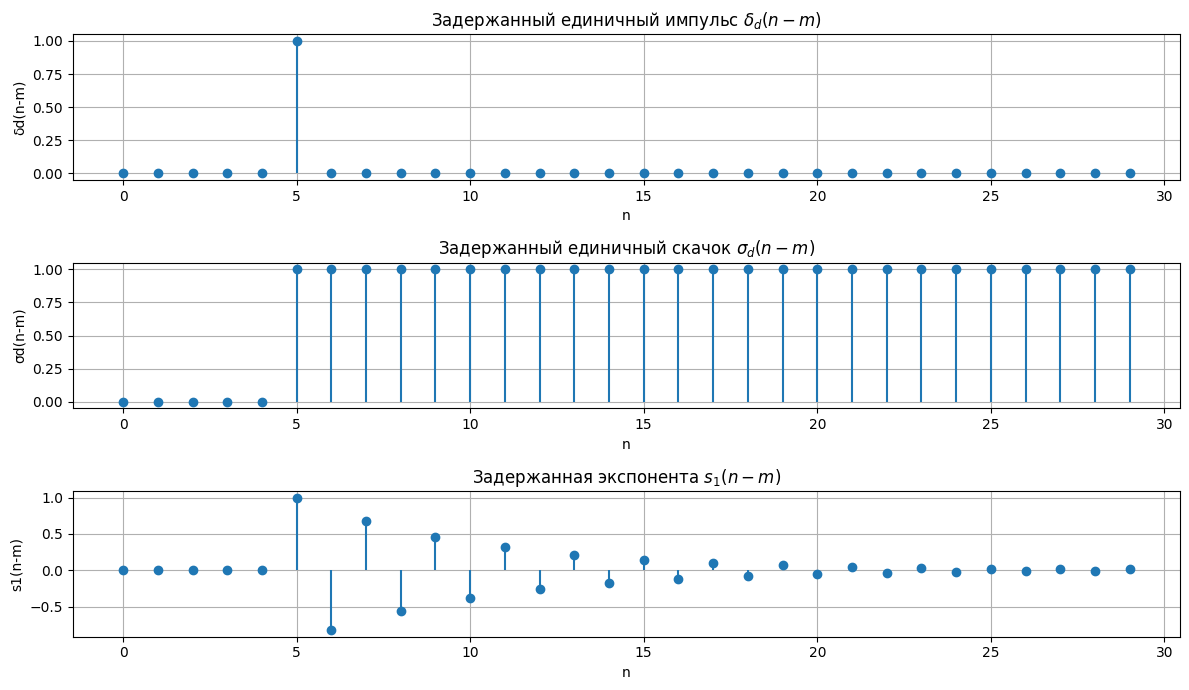

In [13]:
# Задержка на m отсчетов
delta_d_delayed = np.zeros(N)
if m < N:
    delta_d_delayed[m] = 1

sigma_d_delayed = np.zeros(N)
sigma_d_delayed[m:] = 1

s1_delayed = np.zeros(N)
s1_delayed[m:] = a ** (n[m:] - m)

# Построение графиков
plt.figure(figsize=(12, 7))

plt.subplot(3, 1, 1)
plt.stem(n, delta_d_delayed, basefmt=" ")
plt.title(r"Задержанный единичный импульс $\delta_d(n-m)$")
plt.xlabel("n")
plt.ylabel("δd(n-m)")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, sigma_d_delayed, basefmt=" ")
plt.title(r"Задержанный единичный скачок $\sigma_d(n-m)$")
plt.xlabel("n")
plt.ylabel("σd(n-m)")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, s1_delayed, basefmt=" ")
plt.title(r"Задержанная экспонента $s_1(n-m)$")
plt.xlabel("n")
plt.ylabel("s1(n-m)")
plt.grid(True)

plt.tight_layout()
plt.show()

Формулы задержанных последовательностей. Задержка на $m$ отсчётов означает сдвиг вправо на $m$. Тогда:

$$
\delta_d(n - m) = \begin{cases}
1, & n = m, \\
0, & n \neq m,
\end{cases}
$$

$$
\sigma_d(n - m) = \begin{cases}
0, & n < m, \\
1, & n \geq m,
\end{cases}
$$

$$
s_1(n - m) = \begin{cases}
a^{n - m}, & n \geq m, \\
0, & n < m.
\end{cases}
$$

## Выводы

В ходе лабораторной работы были изучены основные типы стандартных дискретных сигналов: единичный импульс, единичный скачок, экспоненциальная и комплексная гармоническая последовательности. Рассмотрена взаимосвязь между нормированным дискретным временем $n$ и физическим временем $t = nT$, а также показано соответствие дискретных сигналов их непрерывным аналогам. Было смоделировано влияние задержки, которая реализуется сдвигом последовательности на заданное число отсчётов. Полученные результаты подтвердили, что дискретные сигналы можно рассматривать как выборку непрерывных функций во времени, а их свойства зависят от периода дискретизации и параметров сигналов.